In [39]:
# Clean & analysis

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [40]:
pd.set_option('display.max_rows', 500)
df = pd.read_csv('input/attacks.csv',encoding='latin-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [41]:
# Use at least 5 data cleaning techniques inside a file named `clean.ipynb`

In [42]:
# Lower case for columns

df.columns = map(str.lower, df.columns)

In [43]:
# Striping spaces

df.columns = map(str.strip, df.columns)

In [44]:
# Renaming columns

df = df.rename(columns={'fatal (y/n)': 'death'})
df = df.rename(columns={'year': 'years'})
df = df[['years','death','species']]

In [45]:
# Removing missing values

df = df.dropna()

In [46]:
# Lower case for species row

df['species'] = df['species'].str.lower()

In [54]:
# Sorting years

df.sort_values(by='years')

,years,death,species
6296,0.0,Y,said to involve a grey nurse shark that leapt ...
6230,0.0,N,"shovelnose guitarfish, adult male"
6227,0.0,Y,questionable
6226,0.0,N,"nurse shark, 2.1 m [7']"
6225,0.0,N,bull shark
...,...,...,...
36,2018.0,N,wobbegong shark
35,2018.0,N,"tiger shark, 12'"
34,2018.0,N,white shark
32,2018.0,N,2 m shark


In [75]:
# Looking for white sharks among death results

df_yes = df[df.death == 'Y']
df_yes = df_yes[df_yes['species'].str.contains('white')]
print(df_yes.shape)

(150, 3)


In [76]:
# Looking for white sharks without death result

df_no = df[df.death == 'N']
df_no = df_no[df_no['species'].str.contains('white')]
print(df_no.shape)

(503, 3)


In [70]:
# Creating specified intervals for years clustering 

bins = np.linspace(0, 2020 , 50)

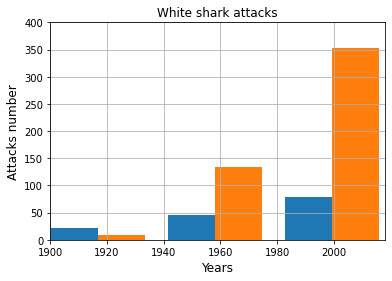

In [71]:
# The graph

plt.hist([df_yes['years'], df_no['years']], bins, label=['deaths', 'no deaths'])

a = plt.title('White shark attacks',fontsize=12)

plt.xlim(1900, 2018, 50)
plt.ylim(0, 400)
plt.grid(True)

plt.xlabel('Years',fontsize=12)
plt.ylabel('Attacks number',fontsize=12)


plt.show()